<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              421 non-null    object 
 1   SCHOOL NAME                      421 non-null    object 
 2   Num of SA

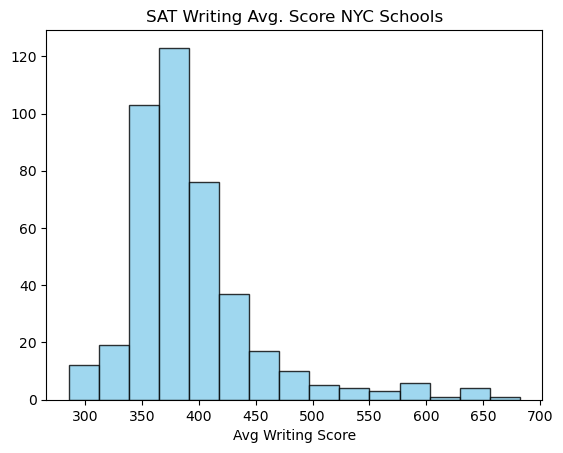

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#  read the dataset
df = pd.read_csv("2012-sat-results.csv")

print(df.info())
print("")

# convert all values to numeric
df["SAT Critical Reading Avg. Score"] = pd.to_numeric(df["SAT Critical Reading Avg. Score"], errors="coerce")
df["SAT Math Avg. Score"] = pd.to_numeric(df["SAT Math Avg. Score"], errors="coerce")
df["SAT Writing Avg. Score"] = pd.to_numeric(df["SAT Writing Avg. Score"], errors="coerce")

# Drop rows with NaN values
df = df.dropna(subset=["SAT Critical Reading Avg. Score", "SAT Math Avg. Score", "SAT Writing Avg. Score"])

print(df.info())
print("")

# population params
mu = df["SAT Writing Avg. Score"].mean()
tao = df["SAT Writing Avg. Score"].sum()
sigmasq = df["SAT Writing Avg. Score"].var(ddof=0)

print(f"The mu is: {mu}")
print(f"The tao is: {tao}")
print(f"The sigma^2 is: {sigmasq}")

print("")

plt.hist(df["SAT Writing Avg. Score"], bins=15, color="skyblue", alpha=0.8, edgecolor="black")
plt.title("SAT Writing Avg. Score NYC Schools")
plt.xlabel("Avg Writing Score")
plt.show()


In [3]:
df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0


## Problem 1

In [14]:
sigma_sq = df["SAT Writing Avg. Score"].var(ddof=0)
sigma_sq

3429.9095356040657

In [24]:
# trying different r-values
r_values = [0.05, 0.01, 0.10, 0.04, 0.03, 0.025, 0.035]

# Critical z-values for the two confidence levels
z_values = {0.90: 1.645, 0.95: 1.96}

# used for calculating d
mu = df["SAT Writing Avg. Score"].mean()

for r in r_values:
    d = r * mu
    print(f"Relative error r = {r}, which gives d = {d:.2f}")
    for conf, z in z_values.items():
        # equation for Sample Size for Estimating a Population Mean with SRS
        n0 = (z**2 * sigma_sq) / d**2
        n = 1/ ((1/n0) + (1/len(df["SAT Writing Avg. Score"])))
        n_ceil = np.ceil(n)  # round up to the nearest whole number
        print(f"  Confidence Level {int(conf*100)}%: n = {n_ceil} (calculated n = {n:.2f})")
    print()

Relative error r = 0.05, which gives d = 19.70
  Confidence Level 90%: n = 23.0 (calculated n = 22.63)
  Confidence Level 95%: n = 32.0 (calculated n = 31.42)

Relative error r = 0.01, which gives d = 3.94
  Confidence Level 90%: n = 248.0 (calculated n = 247.05)
  Confidence Level 95%: n = 282.0 (calculated n = 281.42)

Relative error r = 0.1, which gives d = 39.40
  Confidence Level 90%: n = 6.0 (calculated n = 5.90)
  Confidence Level 95%: n = 9.0 (calculated n = 8.32)

Relative error r = 0.04, which gives d = 15.76
  Confidence Level 90%: n = 35.0 (calculated n = 34.32)
  Confidence Level 95%: n = 48.0 (calculated n = 47.12)

Relative error r = 0.03, which gives d = 11.82
  Confidence Level 90%: n = 58.0 (calculated n = 57.38)
  Confidence Level 95%: n = 78.0 (calculated n = 77.05)

Relative error r = 0.025, which gives d = 9.85
  Confidence Level 90%: n = 78.0 (calculated n = 77.95)
  Confidence Level 95%: n = 103.0 (calculated n = 102.69)

Relative error r = 0.035, which gives d 